In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
data = {"Round of 64":[150, 200, 270, 230, 230, 220, 230], 
        "Round of 32":[160, 280, 240, 260, 240, 260, 260], 
        "Round of 16":[80,  200, 160, 200, 200, 160, 160], 
        "Elite 8":    [0,   80,  0,   80,  80,  80,  80], 
        "Final 4":    [0,   160, 0,   0,   0,   160,  0], 
        "Final":      [0,   0,   0,   0,   0,   320,  0],
        "Percentile": [5, 86, 43, 68, 63, 95, 59]}
rows = ["Random", "High Seed", "Human", "Adaboost", "SVM", "SVM-NoSeed", "Ensemble"]

df = pd.DataFrame(data, index=rows)

df["Total"] = df.iloc[:, :6].sum(1)

## Overall Data

In [20]:
df.sort_values(["Total"], ascending = False)

,Round of 64,Round of 32,Round of 16,Elite 8,Final 4,Final,Percentile,Total
SVM-NoSeed,220,260,160,80,160,320,95,1200
High Seed,200,280,200,80,160,0,86,920
Adaboost,230,260,200,80,0,0,68,770
SVM,230,240,200,80,0,0,63,750
Ensemble,230,260,160,80,0,0,59,730
Human,270,240,160,0,0,0,43,670
Random,150,160,80,0,0,0,5,390


## Round Accuracy

Note that this is not exactly the accuracy for later rounds since errors propagate. Thus even if an error was made in a previous round, the model can still get points in later rounds, so while the matchup it originally made the prediction based off was invalid, it was still "correct" in a sense.

In [24]:
accuracy = df.loc[:, ["Round of 64", "Round of 32", "Round of 16", "Elite 8", "Final 4", "Final"]] * 100 / 320
accuracy

,Round of 64,Round of 32,Round of 16,Elite 8,Final 4,Final
Random,46.875,50.00,25.0,0.0,0.0,0.0
High Seed,62.500,87.50,62.5,25.0,50.0,0.0
Human,84.375,75.00,50.0,0.0,0.0,0.0
Adaboost,71.875,81.25,62.5,25.0,0.0,0.0
SVM,71.875,75.00,62.5,25.0,0.0,0.0
SVM-NoSeed,68.750,81.25,50.0,25.0,50.0,100.0
Ensemble,71.875,81.25,50.0,25.0,0.0,0.0


## Cumulative Scores

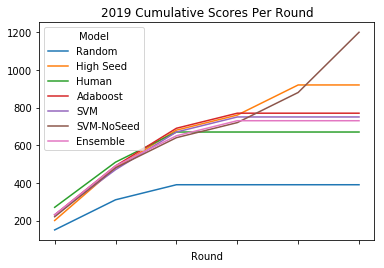

In [41]:
cumulative = df.loc[:, ["Round of 64", "Round of 32", "Round of 16", "Elite 8", "Final 4", "Final"]].cumsum(1)
cumulative = cumulative.transpose()
cumulative.index.name = "Round"
cumulative.plot(title="2019 Cumulative Scores Per Round")